<a href="https://colab.research.google.com/github/nonu0/Object-detection/blob/master/pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import torch 
from torch import nn
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#make 1000 samples

n_samples = 1000
 #create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)
len(X),len(y)

(1000, 1000)

In [ ]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# print(f"first 5 samples of X: {X[:5]}")
print(f"first 5 samples of y: {y[:5]}")

first 5 samples of y: [1 1 1 1 0]


In [ ]:
#make a dataframe

circles = pd.DataFrame({'X1':X[:,0],
                        'X2':X[:,1],
                        'label':y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


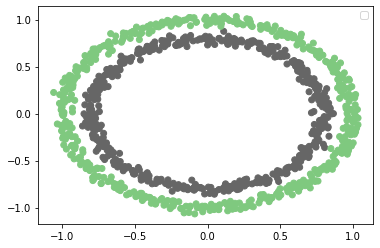

In [ ]:
#visualize data
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.Accent)
plt.legend()

In [ ]:
type(X)

numpy.ndarray

In [ ]:
#Turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [ ]:
print(f'X type:{type(X)},y type:{type(y)},X dtype:{X.dtype},y dtype:{y.dtype}')


X type:<class 'torch.Tensor'>,y type:<class 'torch.Tensor'>,X dtype:torch.float32,y dtype:torch.float32


In [ ]:
#split dataset

# train_split = int(0.8*len(X))
# X_train,y_train = X[:train_split],y[:train_split]
# X_test,y_test = X[train_split:],y[train_split:]
# len(y_test),y_test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

#Building model


In [ ]:
#set device agnostics

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=50)
        self.layer_2 = nn.Linear(in_features=50,out_features=100)
        self.layer_3 = nn.Linear(in_features=100,out_features=1)

    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model = CircleModel()
model

CircleModel(
  (layer_1): Linear(in_features=2, out_features=50, bias=True)
  (layer_2): Linear(in_features=50, out_features=100, bias=True)
  (layer_3): Linear(in_features=100, out_features=1, bias=True)
)

#make predictions


In [ ]:
model.state_dict()

In [ ]:
from torch.autograd.grad_mode import inference_mode
with torch.inference_mode():
    y_preds = model(X_test)
    print(f"Length of predictions :{len(y_preds)},Shape:{y_preds.shape}")
    print(f"Length of test samples :{len(X_test)},Shape:{X_test.shape}")
    print(f"first 10 preddictioms:\n{y_preds[:10]}")
    print(f"first 10 test:\n{X_test[:10]}")
    print(f"first 10 labels:\n{y_test[:10]}")

loss function

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

get accuracy

In [ ]:
def accuracy_fn(y_true,y_preds):
    correct = torch.eq(y_true,y_preds).sum().item()
    acc = (correct/len(y_preds))*100
    return acc

Train model

In [ ]:
#1.forward pass
model.eval()
with inference_mode():
    y_logits = model(X_test)[:5]
y_logits

In [ ]:
#use sigmoid activation tto turn them into prediction probabilities 

y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs [:5]



In [ ]:
y_predictions = torch.round(y_preds_probs)[:5]
y_predictions

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

Training and Testing loop

In [ ]:
torch.manual_seed(42)
epochs = 3000
epoch_count = []
loss_values = []
test_loss_values = []
#forward pass
for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_predictions = torch.round(torch.sigmoid(y_logits))
    #loss function

    # loss_fn = nn.BCEWithLogitsLoss()

    loss = loss_fn(y_logits,y_train)

    accuracy = accuracy_fn(y_true=y_train,y_preds=y_predictions)

    #optimizer
    # optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

    optimizer.zero_grad()

    #backpropagation on loss
    loss.backward()

    #optimizer step 
    optimizer.step()

    #Testing 

    model.eval()
    #forward pass
    with inference_mode():
        test_logits = (model(X_test).squeeze()) # logits
        test_predictions_probabilities = torch.sigmoid(test_logits) #prediction probabilities 
        test_labels = torch.round(test_predictions_probabilities) #same as y_test

        #loss
        test_loss = loss_fn(test_logits,y_test)
        test_accuracy = accuracy_fn(y_true=y_test,y_preds=test_labels)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)

        print(f"Epoch:{epoch} | Loss:{loss:.5f} | Accuracy:{accuracy:.2f}% | test loss:{test_loss:.5f}|Test accuracy:{test_accuracy:.2f}%")






In [ ]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
    print("helper fnction already exists")
else:
    print('downloading helper function')
    request= requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open("helper_functions.py",'wb') as f:
        f.write(request.content)


downloading helper function


In [ ]:
from helper_functions import plot_predictions,plot_decision_boundary 

#plot decision boundary

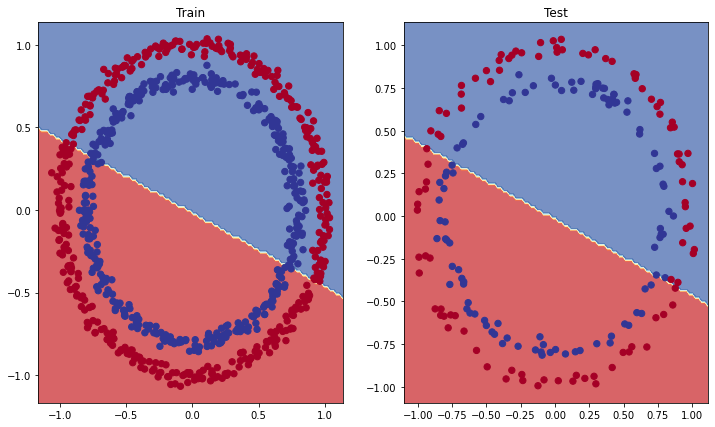

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)